In [4]:
# Define the file path
file_path = './../Person-Tailored Gesture Classification/results/speed.txt'

# Read and parse the file
results = {}

with open(file_path, 'r') as f:
    for line in f:
        name, speed_str = line.split(':', 1)
        name = name.strip()
        speed = float(speed_str.strip())
        results[name] = speed

# Display the parsed results
speed_gpu = []
speed_cpu = []
for name, speed in results.items():
    if name.endswith('0'):
        speed_gpu.append(speed)
    else:
        speed_cpu.append(speed)
    print(f"Name: {name}, Average Speed: {speed:.2f}ms")

Name: Target_0_device_0, Average Speed: 18.25ms
Name: Target_1_device_0, Average Speed: 12.71ms
Name: Target_2_device_0, Average Speed: 14.85ms
Name: Target_3_device_0, Average Speed: 12.51ms
Name: Target_4_device_0, Average Speed: 13.04ms
Name: Target_5_device_0, Average Speed: 16.89ms
Name: Target_6_device_0, Average Speed: 12.87ms
Name: Target_0_device_cpu, Average Speed: 2495.70ms
Name: Target_1_device_cpu, Average Speed: 2579.06ms
Name: Target_2_device_cpu, Average Speed: 2664.09ms
Name: Target_3_device_cpu, Average Speed: 2727.76ms
Name: Target_4_device_cpu, Average Speed: 2718.65ms
Name: Target_5_device_cpu, Average Speed: 2459.30ms
Name: Target_6_device_cpu, Average Speed: 2698.42ms


In [6]:
sum(speed_gpu) / len(speed_gpu)

14.44419366972787

In [8]:
sum(speed_cpu) / len(speed_cpu)

2620.4244369552252

In [26]:
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
import pandas as pd

# Initialize lists to collect results
all_overall_results = []
all_class_metrics = []

for t in range(7):
    print(f'Participant No. {t} - evaluation on SIGGI_full')
    
    # Load ground truth and predictions JSON files
    ground_truth_file = f'./../datasets/SIGGI/full/{t}.json'
    predictions_file = f'./../Person-Tailored Gesture Classification/results/gpu/predictions_{t}.json' 
    
    # Load ground truth labels
    with open(ground_truth_file, 'r') as f:
        ground_truth = json.load(f)

    # Load predictions
    with open(predictions_file, 'r') as f:
        predictions = json.load(f)

    # Extract ground truth labels
    gt_labels = {item['image_id']: item['category_id'] for item in ground_truth['annotations']}

    # Extract predicted labels
    pred_labels = {item['image_id']: item['category_id'] for item in predictions['predictions']}  

    # Ensure the prediction keys match the ground truth keys
    image_ids = list(gt_labels.keys())
    y_true = [gt_labels[img_id] for img_id in image_ids]
    y_pred = [pred_labels.get(img_id, None) for img_id in image_ids]

    # Calculate metrics    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Create a DataFrame for overall results
    overall_results_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Average Score': [accuracy, precision, recall, f1]
    })
    
    # Append to list
    all_overall_results.append(overall_results_df)
    
    # Get unique class labels
    classes = sorted(set(y_true + y_pred))

    # Calculate metrics for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=classes, average=None)

    # Create a DataFrame for per-class metrics
    class_metrics_df = pd.DataFrame({
        'Class': classes,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    # Append to list
    all_class_metrics.append(class_metrics_df)
    
    # Print the DataFrames
    print()
    print(class_metrics_df.to_string(index=False))
    print()
    print(overall_results_df.to_string(index=False))

Participant No. 0 - evaluation on SIGGI_full

 Class  Precision   Recall  F1 Score
     0    1.00000 0.966667  0.983051
     1    0.84375 0.931034  0.885246
     2    0.75000 0.750000  0.750000
     3    0.75000 1.000000  0.857143
     4    1.00000 0.857143  0.923077
     5    1.00000 0.857143  0.923077

   Metric  Average Score
 Accuracy       0.933333
Precision       0.890625
   Recall       0.893664
 F1 Score       0.886932
Participant No. 1 - evaluation on SIGGI_full

 Class  Precision   Recall  F1 Score
     0   0.923077 1.000000  0.960000
     1   0.909091 0.869565  0.888889
     2   1.000000 0.933333  0.965517
     3   1.000000 0.888889  0.941176
     4   1.000000 0.600000  0.750000
     5   0.750000 0.750000  0.750000

   Metric  Average Score
 Accuracy       0.925000
Precision       0.930361
   Recall       0.840298
 F1 Score       0.875930
Participant No. 2 - evaluation on SIGGI_full

 Class  Precision   Recall  F1 Score
     0   0.909091 1.000000  0.952381
     1   0.925926 

In [27]:
# Aggregate overall results
aggregate_overall_results_df = pd.concat(all_overall_results).groupby('Metric').mean().reset_index()

# Aggregate per-class metrics
all_class_metrics_df = pd.concat(all_class_metrics).groupby('Class').mean().reset_index()

# Print aggregated results
print("Aggregated Per-Class Metrics:")
print(all_class_metrics_df.to_string(index=False))

print("\nAggregated Overall Results:")
print(aggregate_overall_results_df.to_string(index=False))

Aggregated Per-Class Metrics:
 Class  Precision   Recall  F1 Score
     0   0.953188 0.988095  0.969826
     1   0.856625 0.878839  0.864089
     2   0.858163 0.833163  0.842229
     3   0.935714 0.880042  0.897462
     4   0.906349 0.782160  0.834133
     5   0.907143 0.810544  0.854307

Aggregated Overall Results:
   Metric  Average Score
 Accuracy       0.919048
 F1 Score       0.877008
Precision       0.902864
   Recall       0.862141


In [28]:
# ONLY CASES WITH TARGET PRESENT & DETECTED 
# (EXCLUDED FALSE NEGATIVES, FALSE POSITIVES AND TRUE NEGATIVES)

import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
import pandas as pd

# Initialize lists to collect results
all_overall_results = []
all_class_metrics = []

for t in range(7):
    print(f'Participant No. {t} - evaluation on SIGGI_full')
    
    # Load ground truth and predictions JSON files
    ground_truth_file = f'./../datasets/SIGGI/full/{t}.json'
    predictions_file = f'./../Person-Tailored Gesture Classification/results/gpu/predictions_{t}.json' 
    
    # Load ground truth labels
    with open(ground_truth_file, 'r') as f:
        ground_truth = json.load(f)

    # Load predictions
    with open(predictions_file, 'r') as f:
        predictions = json.load(f)

    # Extract ground truth labels
    gt_labels = {item['image_id']: item['category_id'] for item in ground_truth['annotations']}

    # Extract predicted labels
    pred_labels = {item['image_id']: item['category_id'] for item in predictions['predictions']}      

    # Ensure the prediction keys match the ground truth keys
    # print(set(gt_labels.keys()) == set(pred_labels.keys()))
    # print(len(image_ids))
    image_ids = list(gt_labels.keys())
    y_true = [gt_labels[img_id] for img_id in image_ids]
    y_pred = [pred_labels[img_id] for img_id in image_ids]
    
    # FILTER OUT ANY CASES WHERE CLASS=-1 
    filtered_indices = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != 0 and pred != 0]
    y_true = [y_true[i] for i in filtered_indices]
    y_pred = [y_pred[i] for i in filtered_indices]
    # print(len(y_true))
    # print(len(y_pred))
    
    # Calculate metrics    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Create a DataFrame for overall results
    overall_results_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Average Score': [accuracy, precision, recall, f1]
    })
    
    # Append to list
    all_overall_results.append(overall_results_df)
    
    # Get unique class labels
    classes = sorted(set(y_true + y_pred))

    # Calculate metrics for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=classes, average=None)

    # Create a DataFrame for per-class metrics
    class_metrics_df = pd.DataFrame({
        'Class': classes,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    # Append to list
    all_class_metrics.append(class_metrics_df)
    
    # Print the DataFrames
    print()
    print(class_metrics_df.to_string(index=False))
    print()
    print(overall_results_df.to_string(index=False))

Participant No. 0 - evaluation on SIGGI_full

 Class  Precision   Recall  F1 Score
     1       0.90 0.931034  0.915254
     2       0.75 0.750000  0.750000
     3       0.75 1.000000  0.857143
     4       1.00 0.857143  0.923077
     5       1.00 0.857143  0.923077

   Metric  Average Score
 Accuracy       0.900000
Precision       0.880000
   Recall       0.879064
 F1 Score       0.873710
Participant No. 1 - evaluation on SIGGI_full

 Class  Precision   Recall  F1 Score
     1   0.909091 0.952381  0.930233
     2   1.000000 1.000000  1.000000
     3   1.000000 1.000000  1.000000
     4   1.000000 0.600000  0.750000
     5   0.750000 0.857143  0.800000

   Metric  Average Score
 Accuracy       0.927273
Precision       0.931818
   Recall       0.881905
 F1 Score       0.896047
Participant No. 2 - evaluation on SIGGI_full

 Class  Precision   Recall  F1 Score
     1   0.925926 0.892857  0.909091
     2   1.000000 0.875000  0.933333
     3   1.000000 1.000000  1.000000
     4   0.666667 

In [29]:
# Aggregate overall results
aggregate_overall_results_df = pd.concat(all_overall_results).groupby('Metric').mean().reset_index()

# Aggregate per-class metrics
all_class_metrics_df = pd.concat(all_class_metrics).groupby('Class').mean().reset_index()

# Print aggregated results
print("Aggregated Per-Class Metrics:")
print(all_class_metrics_df.to_string(index=False))

print("\nAggregated Overall Results:")
print(aggregate_overall_results_df.to_string(index=False))

Aggregated Per-Class Metrics:
 Class  Precision   Recall  F1 Score
     1   0.872747 0.940437  0.903042
     2   0.872449 0.842687  0.852721
     3   0.935714 0.920274  0.919078
     4   0.906349 0.822636  0.854479
     5   0.907143 0.847279  0.870973

Aggregated Overall Results:
   Metric  Average Score
 Accuracy       0.895138
 F1 Score       0.880059
Precision       0.898880
   Recall       0.874663


Participant No. 0 - evaluation on SIGGI_full
{0: '-1', 1: '0', 2: '1', 3: '2', 4: '3', 5: '4'}


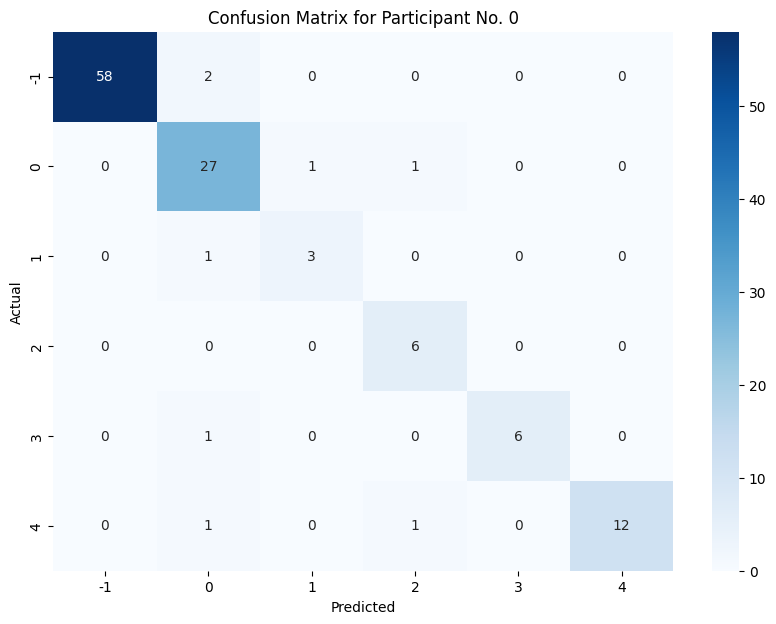

Participant No. 1 - evaluation on SIGGI_full
{0: '-1', 1: '0', 2: '1', 3: '2', 4: '3', 5: '4'}


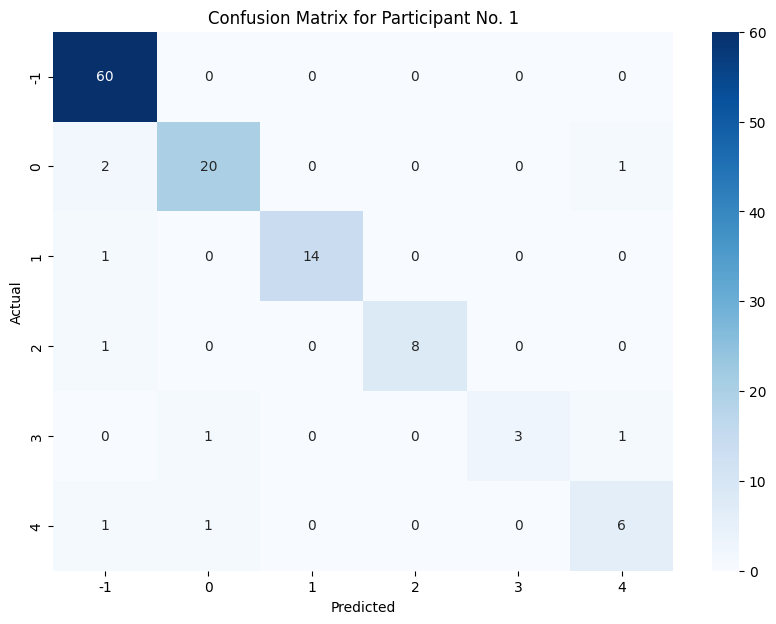

Participant No. 2 - evaluation on SIGGI_full
{0: '-1', 1: '0', 2: '1', 3: '2', 4: '3', 5: '4'}


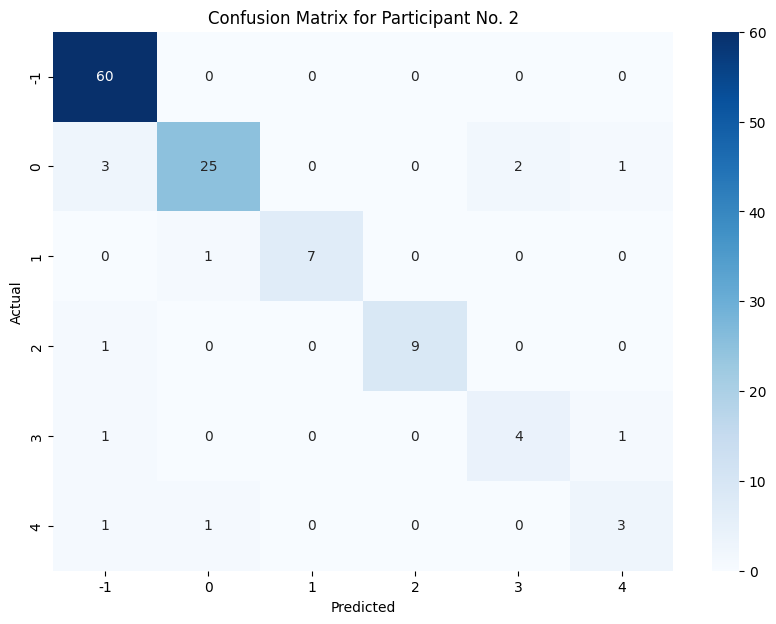

Participant No. 3 - evaluation on SIGGI_full
{0: '-1', 1: '0', 2: '1', 3: '2', 4: '3', 5: '4'}


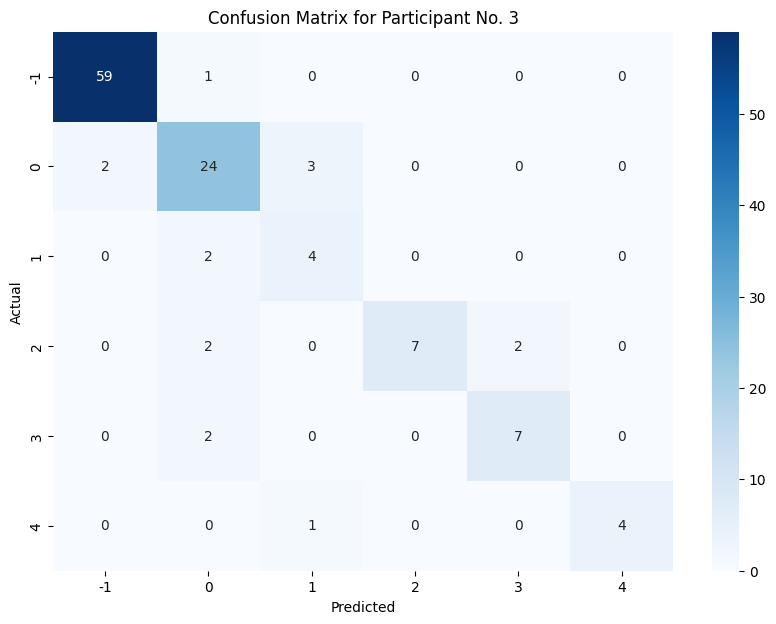

Participant No. 4 - evaluation on SIGGI_full
{0: '-1', 1: '0', 2: '1', 3: '2', 4: '3', 5: '4'}


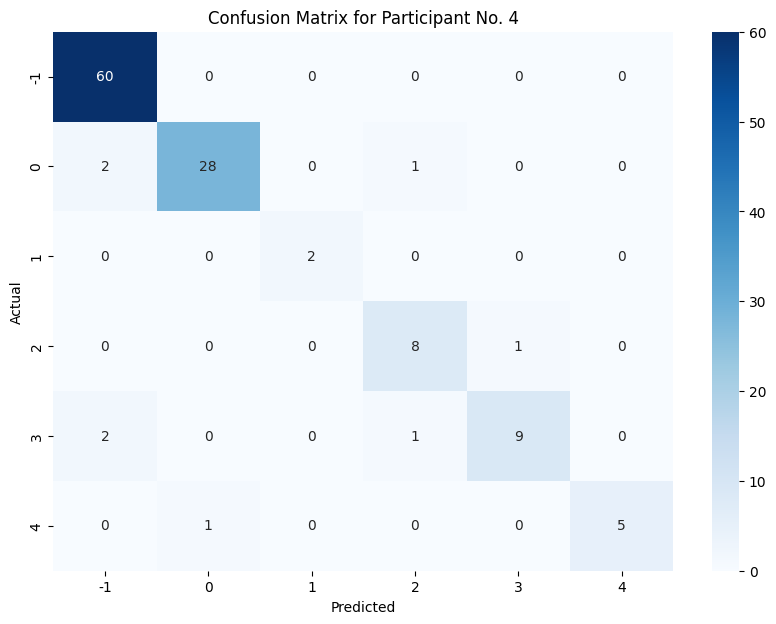

Participant No. 5 - evaluation on SIGGI_full
{0: '-1', 1: '0', 2: '1', 3: '2', 4: '3', 5: '4'}


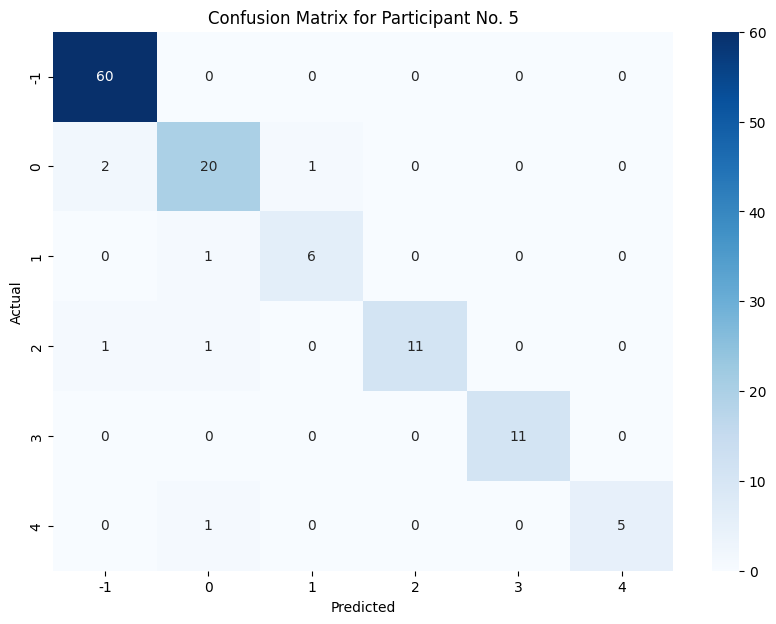

Participant No. 6 - evaluation on SIGGI_full
{0: '-1', 1: '0', 2: '1', 3: '2', 4: '3', 5: '4'}


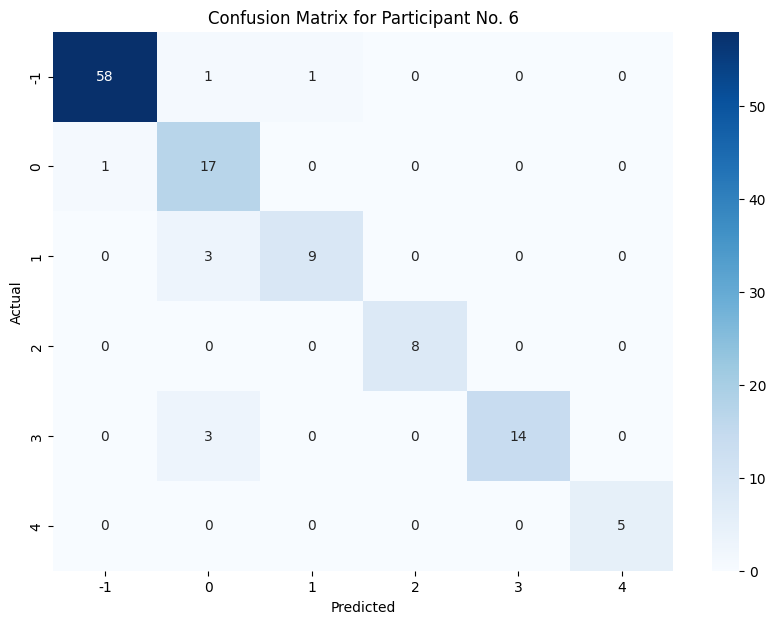

In [5]:
import json
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize an aggregated confusion matrix & category mapping
aggregated_cm = None
category_names = {}

for t in range(7):
    print(f'Participant No. {t} - evaluation on SIGGI_full')
    
    # Load ground truth and predictions JSON files
    ground_truth_file = f'./../datasets/SIGGI/full/{t}.json'
    predictions_file = f'./../Person-Tailored Gesture Classification/results/gpu/predictions_{t}.json' 
    
    # Load ground truth labels
    with open(ground_truth_file, 'r') as f:
        ground_truth = json.load(f)

    # Load predictions
    with open(predictions_file, 'r') as f:
        predictions = json.load(f)
        
    # Extract category ID to name mapping
    if not category_names:
        category_names = {cat['id']: cat['name'] for cat in ground_truth['categories']}
    print(category_names)

    # Extract ground truth labels
    gt_labels = {item['image_id']: item['category_id'] for item in ground_truth['annotations']}

    # Extract predicted labels
    pred_labels = {item['image_id']: item['category_id'] for item in predictions['predictions']}  

    # Ensure the prediction keys match the ground truth keys
    image_ids = list(gt_labels.keys())
    y_true = [gt_labels[img_id] for img_id in image_ids]
    y_pred = [pred_labels.get(img_id, None) for img_id in image_ids]
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Initialize the aggregated confusion matrix if it's the first iteration
    if aggregated_cm is None:
        aggregated_cm = np.zeros_like(cm)

    # Add the current confusion matrix to the aggregated confusion matrix
    aggregated_cm += cm

    # Display confusion matrix for the current participant
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[category_names.get(i, i) for i in range(cm.shape[1])], yticklabels=[category_names.get(i, i) for i in range(cm.shape[0])])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Participant No. {t}')
    plt.show()

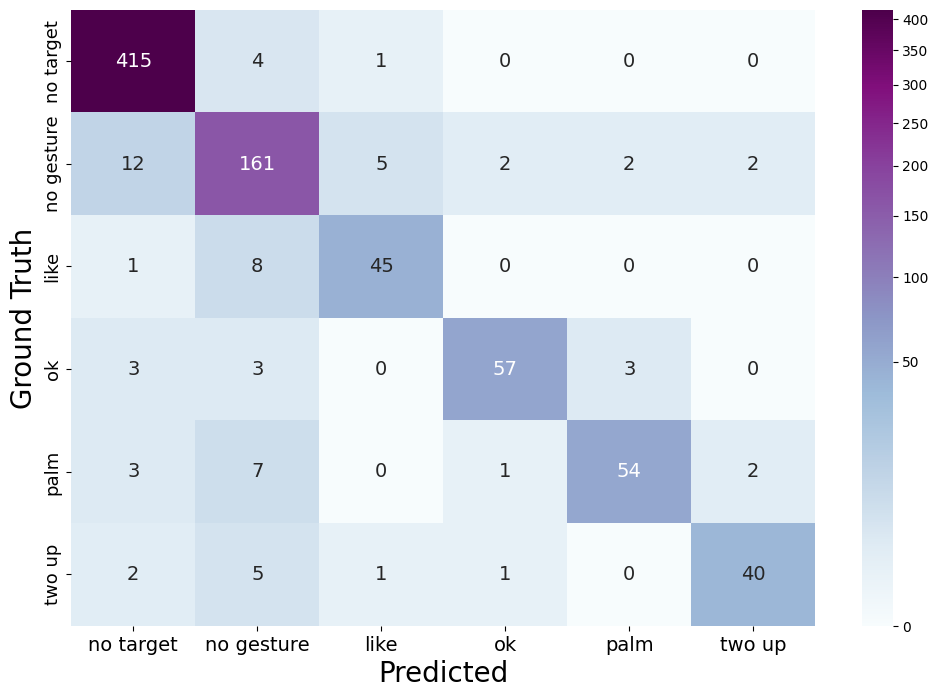

In [95]:
from matplotlib.colors import PowerNorm

# change to class names
category_names = {0: 'no target', 1: 'no gesture', 2: 'like', 3: 'ok', 4: 'palm', 5: 'two up'}

# Create a custom normalization
norm = PowerNorm(gamma=0.4, vmin=0, vmax=np.max(aggregated_cm))

# Display the aggregated confusion matrix
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(aggregated_cm, annot=True, fmt='d', cmap='BuPu', norm=norm, 
                      annot_kws={"size": 14}, 
                      xticklabels=[category_names.get(i, i) for i in range(aggregated_cm.shape[1])], 
                      yticklabels=[category_names.get(i, i) for i in range(aggregated_cm.shape[0])])
# plt.title('Aggregated Confusion Matrix for All Participants (Custom Color Map)', fontsize=18)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Ground Truth', fontsize=20)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=13)
plt.show()